In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import dataset, distance, error, find, historical, split
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

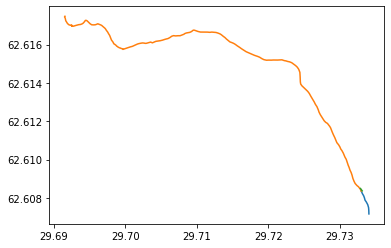

2738.304786419952
17.858005774264473


In [2]:
target_trajectory, data = dataset.load_users_trajectories_with_target(898, 1422284153331)
head, tail = split.split_trajectory_with_overlap(target_trajectory, 0.5)

head_x, head_y = head[:, 0], head[:, 1]
tail_x, tail_y = tail[:, 0], tail[:, 1]

prediction = historical.predict_by_picking_random_tail(data, head, 3)
pred_x, pred_y = prediction[:, 0], prediction[:, 1]

head_x, head_y = head_x[-10:], head_y[-10:]
plt.plot(head_y, head_x)
plt.plot(tail_y, tail_x)
plt.plot(pred_y, pred_x)
plt.show()

print(distance.calculate_trajectory_length_in_meters(tail))
print(distance.calculate_trajectory_length_in_meters(prediction))

In [3]:
THRESHOLD = 10
findings = find.find_point_overlapping_trajectories(data, head[-1], THRESHOLD)

print(len(findings))

6


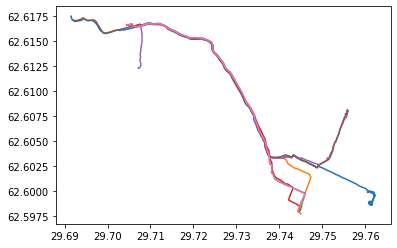

In [4]:
target_x, target_y = target_trajectory[:, 0], target_trajectory[:, 1]
plt.plot(target_y, target_x)

for f in findings:
    x, y = f[:, 0], f[:, 1]
    plt.plot(y, x)
plt.show()

In [5]:
SECONDS = 3
USER_ID = 898
trajectory_ids = dataset.get_list_of_users_trajectory_ids(USER_ID)

errors = []
failed = 0

for trajectory_id in trajectory_ids:
    print(trajectory_id, end='')
    target_trajectory, data = dataset.load_users_trajectories_with_target(USER_ID, trajectory_id)
    head, tail = split.split_trajectory_with_overlap(target_trajectory, 0.75)
    prediction = historical.predict_by_picking_random_tail(data, head, SECONDS)
    if len(prediction) > 0 and np.size(prediction, 0) > 0 and np.size(prediction, 1) == 4:
        error_amount = error.calculate_error_vector(tail, prediction)[:, 4]
        errors.append(error_amount)
        print(' success', len(error_amount), sum(error_amount))
    else:
        failed += 1
        print(' failed')

errors_sum = list(map(sum, errors))

print(
    'ERROR STATISTICS',
    '\naverage\t\t\t', np.average(errors_sum),
    '\nmedian\t\t\t', np.median(errors_sum),
    '\nstandard deviation\t', np.std(errors_sum),
    '\nfailed predictionsn\t', failed
)

1399399033400 success 2 22.493615519901695
1412515702026 success 2 16.076999642313478
1413382616849 failed
1379951571859 success 2 21.066764539722946
1379694392068 success 3 61.58729906377868
1407168712392 success 3 56.67049550000621
1400436362445 success 2 34.92544277826141
1407593205810 success 3 79.67299088865335
1396953544784 success 2 19.44030691793857
1408208026280 success 3 90.15226143797867
1404054152819 success 3 31.901651408039008
1401891357857 success 2 2.9680838960088676
1394042416405 success 2 24.25849108133304
1380211927794 success 2 24.538457337062997
1377681725292 success 3 27.77929303898906
1397840479593 failed
1398930716368 success 3 57.55015060503804
1396260541459 success 2 9.647933705685222
1404467994679 success 3 66.70008843076276
1412416411095 success 3 36.093944167685905
1402152509191 success 2 6.857898457035493
1396248149245 success 2 12.841558275903816
1394124365881 success 2 15.014388957634168
1378233064717 success 3 8.79976521380661
1399030904904 success 2 23

1398950579993 success 2 8.822175732079941
1400516669614 failed
1399114147275 success 3 85.0503878038526
1402150535665 success 3 92.97426736295971
1399394187864 success 2 18.921754392704507
1398804901404 success 3 47.31818651641778
1379916826526 success 2 6.298410230436875
1376515540061 success 3 8.473431076572675
1420408393574 success 3 16.66572543790953
1422260072459 success 2 34.27574481118527
1401899262438 success 2 20.811523670176253
1400432526617 success 2 5.2921936755122045
1381501577925 success 3 13.792124327912465
1421817683355 success 2 31.88673455484866
1385765665361 success 2 62.06122903521181
1405177495739 success 2 35.189751456660396
1385655133350 success 3 81.02096360060034
1379297511974 success 3 43.66624640717376
1396176388745 success 2 23.780876899477803
1392046607416 success 2 13.485362725157033
1379689028371 success 2 40.8822576529178
1378276872668 success 2 19.58078727816725
1401988971730 success 2 7.703108838471858
1398937770729 success 2 41.4544656617115
138576371